In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import KFold
from __future__ import division
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
Reading the Dataset
'''
Read = pd.read_csv('db_gun.csv',header=None)

In [3]:
'''
Processing Data - COnvert each field to int/float
'''
Dataset = Read[1:]
Data = Dataset.values

read_x = Data[:,2:]
read_x.astype(int)

read_y1 = Data[:,0]
read_y1.astype(int)

read_y2 = Data[:,1]
read_y2.astype(int)

read_y = Data[:,:2]
read_y = read_y.astype(int)

Data_X = []
for r in Data:
    row = []
    for e in r:
        row.append(int(e))
    np.array(row)
    Data_X.append(row)

Data_X = np.array(Data_X)

X = []
for r in read_x:
    row = []
    for e in r:
        row.append(int(e))
    np.array(row)
    X.append(row)

X = np.array(X)

Y1 = []
for e in read_y1:
    Y1.append(int(e))

# y = np.array(Y1)

Y2 = []
for e in read_y2:
    Y2.append(int(e))

# y = np.array(Y1)

Y = []
for r in read_y:
    row = []
    for e in r:
        row.append(int(e))
    row = np.array(row)
    Y.append(row)

y = np.array(Y)

In [11]:
'''
Training function
'''
def Train_bp(X, Y, l, ite, hidden_nodes):
#     print "Training"
    val = 1/len(X[0])
    W = np.empty(shape=[len(X[0]),5])
    W_inner = np.empty(shape=[hidden_nodes,3])
    W.fill(val)
    W_inner.fill(val)
    bias = np.empty(5)
    bias.fill(val)
    bias_final = np.empty(3)
    bias_final.fill(val)
    I = np.empty(5)
    O = np.empty(5)
    E = np.empty(5)
    final_i = np.empty(3)
    final_o = np.empty(3)
    error_o = np.empty(3)
    flag = True
    it = 0
    while(flag):
        it += 1
        if(it>ite):
            break
        flag = False
        for i in range(len(X)):
            for j in range(5):
                I[j] = W[:,j].dot(X[i]) + bias[j]
                O[j] = 1/(1+math.exp(I[j]*-1))
            for out in range(3):
                final_i[out] = W_inner[:,out].dot(O) + bias_final[out]
                final_o[out] = 1/(1+math.exp(final_i[out]*-1))
                error_o[out] = final_o[out]*(1-final_o[out])*(Y[i]-final_o[out])
                if error_o[out]!=0:
                    flag = True
                bias_final[out] += l*error_o[out]
            for j in range(5):
                sigma = 0
                for out in range(3):
                    sigma += error_o[out]*W_inner[j][out]
                E[j] = O[j]*(1-O[j])*sigma
#                     E[j] = O[j]*(1-O[j])*(error_o*W_inner[j])
                for out in range(3):
                    W_inner[j][out] += l*error_o[out]*O[j]
                bias[j] += l*E[j]
            for k in range(len(Data_X[0,2:])):
                for l in range(5):
                    W[k,l] += l*E[l]*X[i,k]
    return W, W_inner, bias, bias_final              

In [9]:
'''
Testing function
'''
def Test_bp(X, W, Wt_i, bias, bias_final):
#     print "testing"
    result = []
    I = np.empty(5)
    O = np.empty(5)
    final_i = np.empty(3)
    final_o = np.empty(3)
    for i in range(len(X)):
        for j in range(5):
            I[j] = W[:,j].dot(X[i]) + bias[j]
            O[j] = 1/(1+math.exp(I[j]*-1))
        for out in range(3):
            final_i[out] = Wt_i[:,out].dot(O) + bias_final[out]
            final_o[out] = 1/(1+math.exp(final_i[out]*-1))
#         print final_o
        temp = np.argmax(final_o) +1
#         temp = np.random.randint(0, 3, size=1) + 1
        result.append(temp)
    return np.array(result)

In [17]:
'''
KFold cross-validation - Severity
'''
l = 0.1
final_acc = []
# hidden_nodes = [2,3,4,5,6,7,8]
# for h in hidden_nodes:
acc = [] #Accuracy array
y1_list = []
kf = KFold(len(Data_X), n_folds=10)
totcmat = np.zeros((2,2))
totacc = 0
totpre = 0
totrec = 0
iteration = 0
for tr,te in kf:
    iteration += 1
    train = Data_X[tr]
    test = Data_X[te]
    train_y = train[:,0]
    test_y = test[:,0]
    train_x = train[:,2:]
    test_x = test[:,2:]
    #Call the training function
    Wt, Wt_i, bias, bias_final = Train_bp(train_x, train_y, l, 100, 5)
    #Call the testing function
    result = Test_bp(test_x, Wt, Wt_i, bias, bias_final)
#         print result
#         print test_y
    cmat = confusion_matrix(test_y, result, [1,2, 3])
#     print cmat
    totacc = (cmat[0][0]+cmat[1][1]+cmat[2][2]+cmat[2][0])/(np.sum(cmat)-0.1)
#     print totacc

#         print ""
#         print "Accuracy in Percentage"
#         print totacc*100, "%"
    acc.append(totacc)
    y1_list.append(totacc)
acc = np.array(acc)
#     print ""
#     print "---------------------------------------------------------------"
#     print "             No. of hidden nodes  = ",h
#     print "---------------------------------------------------------------"
#     print np.mean(acc)*100, "%"
final_acc = np.mean(acc)
print "Average Accuracy  of Severity Prediction: ",final_acc*100,"%"

Average Accuracy  of Severity Prediction:  73.6211031175 %


In [16]:
'''
KFold cross-validation - Type
'''
l = 0.1
final_acc = []
# hidden_nodes = [2,3,4,5,6,7,8]
# for h in hidden_nodes:
acc = [] #Accuracy array
y2_list = []
kf = KFold(len(Data_X), n_folds=10)
totcmat = np.zeros((2,2))
totacc = 0
totpre = 0
totrec = 0
iteration = 0
for tr,te in kf:
    iteration += 1
    train = Data_X[tr]
    test = Data_X[te]
    train_y = train[:,1]
    test_y = test[:,1]
    train_x = train[:,2:]
    test_x = test[:,2:]
    #Call the training function
    Wt, Wt_i, bias, bias_final = Train_bp(train_x, train_y, l, 100, 5)
    #Call the testing function
    result = Test_bp(test_x, Wt, Wt_i, bias, bias_final)
#         print result
#         print test_y1
    cmat = confusion_matrix(test_y, result, [1,2, 3])
#     print cmat
    totacc = (cmat[0][0]+cmat[1][1]+cmat[2][2])/np.sum(cmat)
#     print totacc

#         print ""
#         print "Accuracy in Percentage"
#         print totacc*100, "%"
    acc.append(totacc)
    y2_list.append(totacc)
acc = np.array(acc)
#     print ""
#     print "---------------------------------------------------------------"
#     print "             No. of hidden nodes  = ",h
#     print "---------------------------------------------------------------"
#     print np.mean(acc)*100, "%"
final_acc = np.mean(acc)
print "Average Accuracy  for Type Prediction: ",final_acc*100,"%"

Average Accuracy  for Type Prediction:  81.0989010989 %


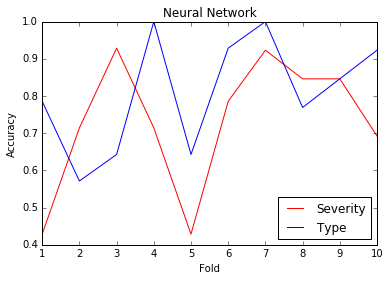

In [33]:
'''
Plotting the graph for accuracy vs. Fold for Severity and Type
'''
x_axis = np.arange(1,11,1)
plt.gca().set_prop_cycle('color',['red', 'blue'])
# acc_th = np.reshape(acc,(-1,9))
plt.plot(x_axis,y1_list)
plt.plot(x_axis,y2_list)
plt.legend(['Severity','Type'], loc='lower right')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Neural Network')
plt.show()